In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
import matplotlib.cm as cm
import cPickle as pickle
import helpers
import plots
import pandas as pd
import glob
reload(plots)
reload(helpers)

<module 'helpers' from 'helpers.pyc'>

# Figure 5 notebook

In [2]:
## Load posterior mean dataframe
print 'Loading posterior mean dataframe'
df = pickle.load(open('pm_df.p', 'rb'))
print 'Loading posterior sample dictionary'
data_dict = pickle.load(open('indiv_dict.p', 'rb'))
print 'Loading group sample dictionary'
group_dict = pickle.load(open('group_dict.p', 'rb'))

mpl.rcParams.update({'font.size': 16})

Loading posterior mean dataframe
Loading posterior sample dictionary
Loading group sample dictionary


## Figure 5A: Comparative effects on cumulative feeding for different high-dose PYY administration protocols. Horizontal bars indicate switching to the PYY 300 nmol/kg posterior, mimicking the effects of PYY administration

27.376513600414295 2.2309484210012847


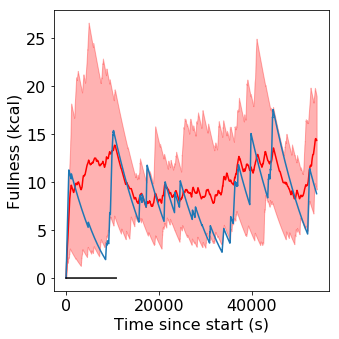

In [3]:
reload(plots)
reload(helpers)

protocol = [(3,'saline_0.0_A_D_trace.p'),
            (6,'PYY_300.0_A_D_trace.p'),
            (3,'GLP-1_300.0_A_D_trace.p'),
            (3,'saline_0.0_A_D_trace.p')]

"""
protocol = [(3, 'saline_0.0_A_D_trace.p'),
            (3, 'sib_0.9_A_D_trace.p'),
            (3, 'saline_0.0_A_D_trace.p'),
            (3, 'sib_0.9_A_D_trace.p')]
"""

fig, axes = plots.dosing_protocol(group_dict, 
                                  protocol, 
                                  num_samples=10)

axes.set_xlabel('Time since start (s)')
axes.set_ylabel('Fullness (kcal)')

## Save figure
fig.tight_layout()
plt.savefig('figures/5A.svg')

plt.show()

## Figure 5B: Optimal dosing protocol for a combination of PYY, LiCl, and sibutramine to minimise feeding. Coloured horizontal bars indicate posterior switches as in 5A.

/home/tmcgrath/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


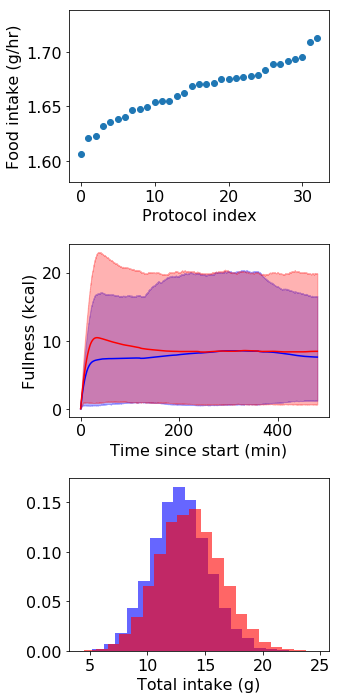

(13.699584379302914, [(2, 'saline_0.0_R_L_trace.p'), (2, 'saline_0.0_R_L_trace.p'), (2, 'saline_0.0_R_L_trace.p'), (2, 'saline_0.0_R_L_trace.p')])
(13.107414449472973, [(2, 'PYY_300.0_R_L_trace.p'), (2, 'saline_0.0_R_L_trace.p'), (2, 'saline_0.0_R_L_trace.p'), (2, 'LiCl_64.0_R_L_trace.p')])
(12.849026496025944, [(2, 'LiCl_64.0_R_L_trace.p'), (2, 'saline_0.0_R_L_trace.p'), (2, 'saline_0.0_R_L_trace.p'), (2, 'LiCl_64.0_R_L_trace.p')])
(13.349476613561178, [(2, 'saline_0.0_R_L_trace.p'), (2, 'saline_0.0_R_L_trace.p'), (2, 'LiCl_64.0_R_L_trace.p'), (2, 'PYY_300.0_R_L_trace.p')])


In [4]:
reload(plots)
reload(helpers)

## NOTE: default drug is the first one in the list
druglist = ['saline_0.0_R_L_trace.p',
            'LiCl_64.0_R_L_trace.p',
            'PYY_300.0_R_L_trace.p']

fig, axes, ranked_protocols = plots.optimise_protocols(group_dict, 
                                                       druglist, 
                                                       4, 
                                                       2,
                                                       min_default=2,
                                                       num_samples=10000, 
                                                       cutoff=300,
                                                       pc=5)
## Label axes
axes[0].set_ylabel('Food intake (g/hr)')
axes[0].set_xlabel('Protocol index')

axes[1].set_ylabel('Fullness (kcal)')
axes[1].set_xlabel('Time since start (min)')

axes[2].set_xlabel('Total intake (g)')

## Save figure
fig.tight_layout()
plt.savefig('figures/5B.svg')

plt.show()

print ranked_protocols[-1]
print ranked_protocols[5]
print ranked_protocols[0]
print ranked_protocols[15]

In [5]:
print ranked_protocols[14]

(13.29902673083872, [(2, 'PYY_300.0_R_L_trace.p'), (2, 'saline_0.0_R_L_trace.p'), (2, 'PYY_300.0_R_L_trace.p'), (2, 'saline_0.0_R_L_trace.p')])


## Figure 5C: Inter-group variation in response to a behavioural intervention: artificially terminating meals when fullness reaches 15kcal. Posterior mean values coloured by change in mean food intake under behavioural intervention.

In [6]:
reload(plots)
reload(helpers)
"""
for key in group_dict.keys():
    print key
    fig, axes = plots.behav_change_effect_group(group_dict,
                                                key,
                                                15,
                                                num_samples=100,
                                                duration=4*60*60)

    plt.show()
"""

'\nfor key in group_dict.keys():\n    print key\n    fig, axes = plots.behav_change_effect_group(group_dict,\n                                                key,\n                                                15,\n                                                num_samples=100,\n                                                duration=4*60*60)\n\n    plt.show()\n'

## Figure 5D: Response curve for limiting food intake in light and dark ad libitum fed rats

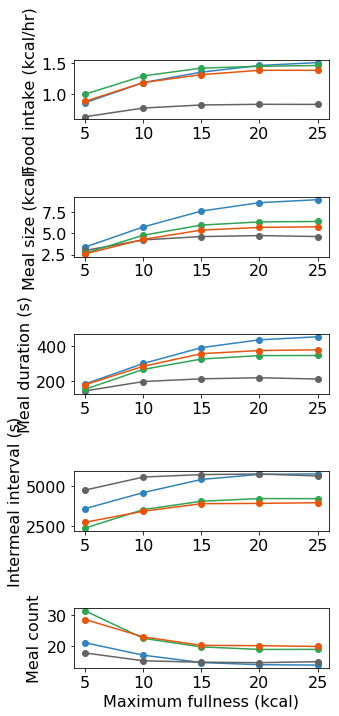

In [7]:
reload(plots)
reload(helpers)
"""
indivs = ['saline_0.0_A_L_trace.p',
          'saline_0.0_R_L_trace.p', 
          'PYY_1.5_R_L_trace.p',
          'PYY_7.5_R_L_trace.p',
          'PYY_300.0_R_L_trace.p']
"""

indivs = ['saline_0.0_R_L_trace.p',
          'saline_0.0_A_L_trace.p',
          'PYY_300.0_R_L_trace.p',
          'LiCl_64.0_R_L_trace.p']

"""
indivs = ['saline_0.0_R_D_trace.p',
          'saline_0.0_A_D_trace.p']

"""
fig, axes = plots.behav_response_curve(group_dict,
                                       indivs,
                                       np.linspace(5, 25, 5),
                                       num_samples=100,
                                       duration=24*60*60)

axes[4].set_xlabel('Maximum fullness (kcal)')
axes[0].set_ylabel('Food intake (kcal/hr)')
axes[1].set_ylabel('Meal size (kcal)')
axes[2].set_ylabel('Meal duration (s)')
axes[3].set_ylabel('Intermeal interval (s)')
axes[4].set_ylabel('Meal count')

## Save figure
fig.tight_layout()
plt.savefig('figures/5C.svg')

plt.show()

## Figure 5E: Effect of refractory period on food intake

Generating samples for saline_0.0_R_D_trace.p
Generating samples for PYY_300.0_A_D_trace.p
Generating samples for saline_0.0_A_D_trace.p


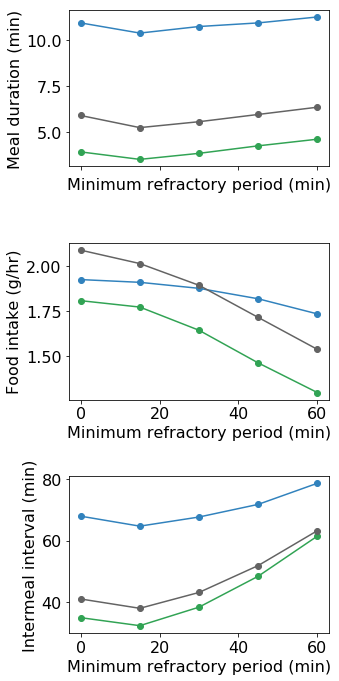

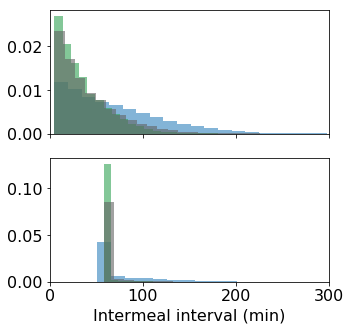

In [8]:
reload(plots)
reload(helpers)
import fwd_sample as fs
reload(fs)

"""
indivs = ['saline_0.0_A_L_trace.p',
          'saline_0.0_R_L_trace.p', 
          'PYY_1.5_R_L_trace.p',
          'PYY_7.5_R_L_trace.p',
          'PYY_300.0_R_L_trace.p']
"""
"""
indivs = ['saline_0.0_R_L_trace.p',
          'saline_0.0_A_L_trace.p',
          'PYY_300.0_R_L_trace.p',
          'LiCl_64.0_R_L_trace.p']
"""

indivs = ['saline_0.0_R_D_trace.p',
          'PYY_300.0_A_D_trace.p',
          'saline_0.0_A_D_trace.p']


fig, axes, fig2, axes2 = plots.refractory_period(group_dict,
                                                 indivs,
                                                 np.linspace(60*0, 60*60, 5),
                                                 num_samples=1000,
                                                 duration=8*60*60,
                                                 figsize=(5,9.75))

axes[0].set_xlabel('Minimum refractory period (min)')
axes[1].set_xlabel('Minimum refractory period (min)')
axes[2].set_xlabel('Minimum refractory period (min)')

axes[0].set_ylabel('Meal duration (min)')
axes[1].set_ylabel('Food intake (g/hr)')
axes[2].set_ylabel('Intermeal interval (min)')


axes[0].set_xticklabels([])
#axes[1].set_xticklabels([])


axes2[0].set_xlim([0, 300])
axes2[1].set_xlim([0, 300])
axes2[0].set_xticklabels([])
axes2[1].set_xlabel('Intermeal interval (min)')

## Save figure
fig.tight_layout()
fig.savefig('figures/5E.svg')
fig2.savefig('figures/5F.svg')

plt.show()